## 模型评价与验证
## 项目 1: taitannike




---
## 第一步. 导入数据

导入数据之前如果数据干净，特征工程会简单

根据直觉、业务逻辑剔除掉没有用的特征
- PassengerId：数据的id（**没有用**）
- Survived：是否获救（**有用,并且是我们的预测值**）
- Pclass：
- Name:(**没有用**)
- Sex:
- Age:
- SibSp:
- Parch:
- Ticket:(**没有用**)
- Fare:
- Cabin:
- Embarked:

删掉的数据

    PassengerId，Name，Ticket

删掉后的数据

    Pclass Sex Age SibSp Parch Fare Cabin Embarked
    
空值数据

     Age Cabin
    
    
字符串的数据
    
    Sex Cabin Embarked
    



In [35]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
# import visuals as vs # Supplementary code
    
# 让结果在notebook中显示
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [36]:
# 载入数据集
data = pd.read_csv('data/train.csv')

str = ['PassengerId','Name','Ticket']
for i,j in enumerate(str):
    data = data.drop(j, axis = 1)



print("看每列统计信息", data.describe())
data.info()

data_train = data.values
for idx, itr in enumerate(data.dtypes):
    if itr == np.object:
        print("第%d列字符类个数："%idx, len(set(data_train[:, idx])))

    
# 完成
# print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

看每列统计信息          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int

---
## 第二步. 分析数据
在项目的第一个部分。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测**船员获救**的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `Pclass Sex Age SibSp Parch Fare Cabin Embarked`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'Survived'`，是我们希望预测的变量。

他们分别被存在`features`和`target`两个变量名中。

### 处理空值


In [37]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    return df, rfr



data,rfr = set_missing_ages(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


### 处理字符串

In [38]:
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df
data = set_Cabin_type(data)
data.info()

dummies_Cabin = pd.get_dummies(data['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data['Pclass'], prefix= 'Pclass')
df = pd.concat([data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Sex', 'Cabin', 'Embarked'], axis=1, inplace=True)
data = df
data.info()
#数据保存
data.to_csv("data/train1.csv")
#获取数据
data = pd.read_csv('data/train1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived      891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin_No      891 non-null uint8
Cabin_Yes     891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2 

### 查看预测数据的情况
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`target`中的`'Survived'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [39]:
#TODO 1
target = data['Survived']
features = data.drop('Survived', axis = 1)
#目标：计算价值的最小值
minimum_target = np.min(target)

#目标：计算价值的最大值
maximum_target = np.max(target)

#目标：计算价值的平均值
mean_target = np.mean(target)

#目标：计算价值的中值
median_target = np.median(target)

#目标：计算价值的标准差
std_target = np.std(target)

#目标：输出计算的结果
print("Statistics for Boston housing dataset:\n")
print("Minimum target: ${:,.2f}".format(minimum_target))
print("Maximum target: ${:,.2f}".format(maximum_target))
print("Mean target: ${:,.2f}".format(mean_target))
print("Median target ${:,.2f}".format(median_target))
print("Standard deviation of target: ${:,.2f}".format(std_target))

Statistics for Boston housing dataset:

Minimum target: $0.00
Maximum target: $1.00
Mean target: $0.38
Median target $0.00
Standard deviation of target: $0.49


### 特征观察



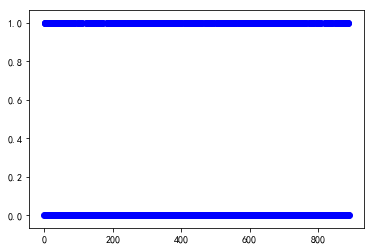

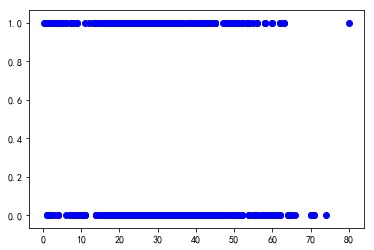

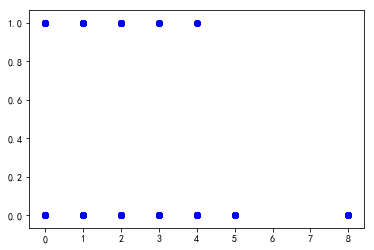

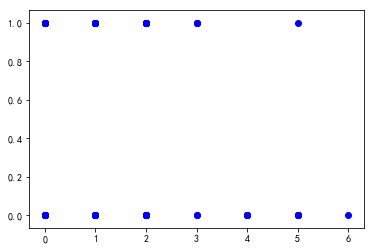

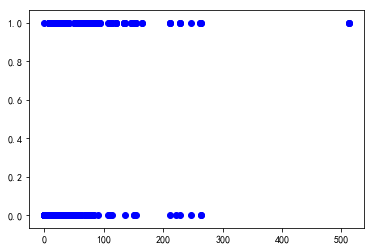

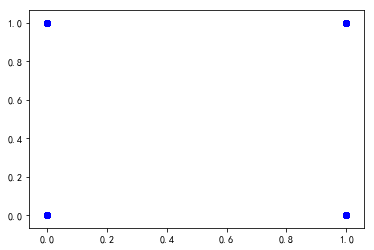

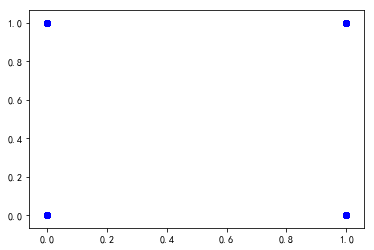

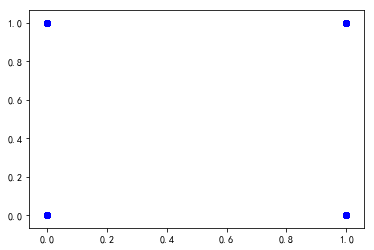

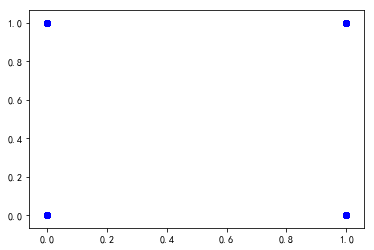

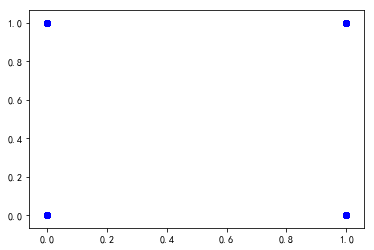

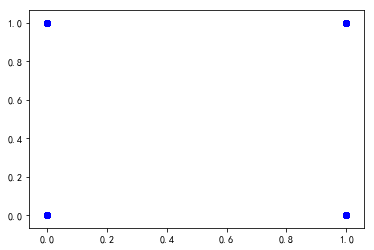

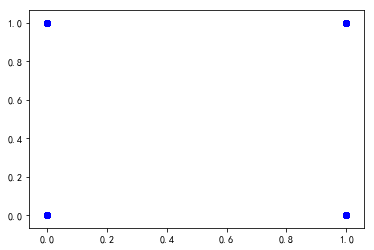

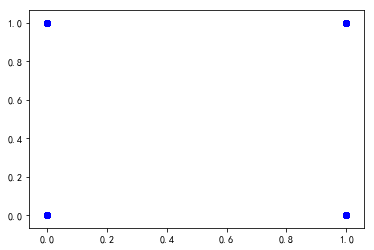

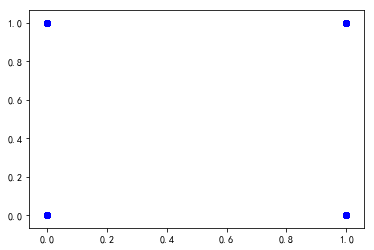

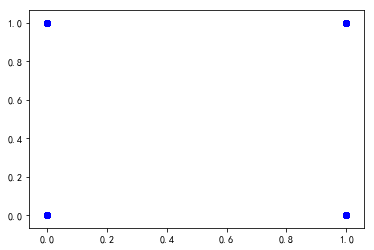

In [40]:
import matplotlib
for i ,j in enumerate(features.columns):
    matplotlib.pyplot.scatter(features[j], target, c='b')
    matplotlib.pyplot.show()



## 数据的切分
接下来，需要把数据成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`target`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
  
  
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

1.将数据集按一定比例分成两部分可以用测试集验证评估模型对新数据的预测效果，比如是否存在欠拟合和过拟合问题等。

2.如果用模型已经见过的数据，那么体现不出模型的泛化能力，即对新数据的预测效果。

3.如果没有测试集则我们对模型的好坏无法作出准确的评估。

In [41]:
# TODO 2

# 提示： 导入train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

print("Train test split success!")

Train test split success!


## 第三步.模型的选择
根据数据只有两个类，可以选择分类模型

特征选择
- RFE

特征扩展
- PolynomialFeatures

分类模型有
- 逻辑回归
- XGboost
- 随机森林
评价指标是
- 混淆矩阵(confusion_matrix)

### 数据格式转化

In [42]:
# X_train_temp = X_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# train_df.to_csv("processed_titanic.csv" , encoding = "utf-8")
X = X_train.as_matrix()
print(X[1,:])

# X_train_temp = y_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# train_df.to_csv("processed_titanic.csv" , encoding = "utf-8")
y = y_train.as_matrix()

# # y即Survival结果
# y = train_np[:, 0]
# # X即特征属性值
# X = train_np[:, 1:]

[439.   31.    0.    0.   10.5   1.    0.    0.    0.    1.    0.    1.
   0.    1.    0. ]


### 特征选择RFE
可以减小过拟合


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selector = RFE(estimator=LogisticRegression(), n_features_to_select=6).fit(X, y)
X = selector.transform(X)
print(X.shape)

(712, 6)


### 特征扩展PolynomialFeatures
可以提高精度，减小过拟合

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
print(X.shape)
X = poly.fit_transform(X)
print(X.shape)

(712, 6)
(712, 28)


### 逻辑回归

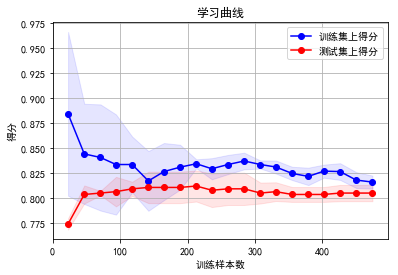

(0.8094449405641095, 0.025658105503983397)

In [45]:


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"测试集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

from sklearn import linear_model
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
clf = linear_model.LogisticRegression(C=100.0, penalty='l1', tol=1e-6)
plot_learning_curve(clf, u"学习曲线", X, y)




### XGboost

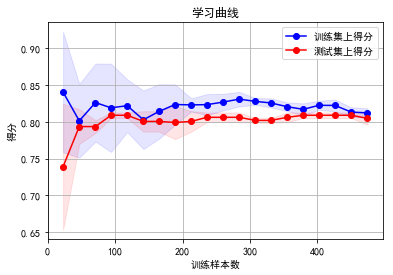

(0.8072485533839016, 0.02239707166585081)

In [46]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth = 3, n_estimators = 5)
# (6) 绘制learning curve
plot_learning_curve(clf, u"学习曲线", X, y)

## 随机森林


(712, 28)


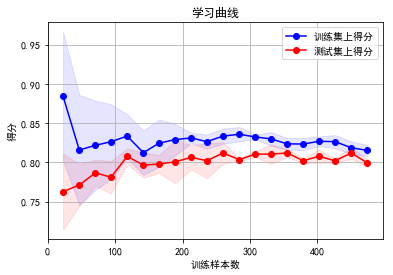

(0.807983861903045, 0.02805406935370125)

In [47]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=5)
print(X.shape)
# (6) 绘制learning curve
plot_learning_curve(clf, u"学习曲线", X, y)

## 第四步 模型训练


## 数据格式转化

In [48]:
X_train, X_test, y_train, y_test

X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

### 评价指标选择R^2

In [49]:

from sklearn.metrics import confusion_matrix
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
#     score = r2_score(y_true, y_predict, sample_weight=None, multioutput=None)
    score = confusion_matrix(y_true, y_predict)


    return score

### 逻辑回归训练

In [50]:
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
clf = linear_model.LogisticRegression(C=100.0, penalty='l1', tol=1e-6)
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)


print("评分为",performance_metric(y_test,y_pre))

评分为 [[96 14]
 [18 51]]


### Xgboost训练

In [51]:
import xgboost as xgb
import visuals as vs # Supplementary code
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)
# vs.ModelComplexity(clf,X_train, y_train)
# vs.ModelLearning(X_train, y_train)
#说明max_depth=3

#训练得到最优的model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# def fit_model(clf,X, y):
#     """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
#     cross_validator = KFold(n_splits=10, shuffle=False, random_state=None)
    
# #     regressor = DecisionTreeRegressor()

#     params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

#     scoring_fnc = make_scorer(performance_metric)

#     grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scoring_fnc, cv=cross_validator)

#     # 基于输入数据 [X,y]，进行网格搜索
#     grid = grid.fit(X, y)

#     # 返回网格搜索后的最优模型
#     return grid.best_estimator_

# optimal_reg = fit_model(clf,X_train, y_train)
# print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))



### 随机森林训练

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=5)
clf.fit(X_train,y_train)
# vs.ModelComplexity(clf,X_train, y_train)
# vs.ModelLearning(X_train, y_train)

# def fit_model(clf,X, y):
#     """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
#     cross_validator = KFold(n_splits=10, shuffle=False, random_state=None)
    
# #     regressor = DecisionTreeRegressor()

#     params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

#     scoring_fnc = make_scorer(performance_metric)

#     grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scoring_fnc, cv=cross_validator)

#     # 基于输入数据 [X,y]，进行网格搜索
#     grid = grid.fit(X, y)

#     # 返回网格搜索后的最优模型
#     return grid.best_estimator_

# optimal_reg = fit_model(clf,X_train, y_train)
# print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 第五步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。


In [53]:
# 随便选择上面一个模型
client_data = [[436.,31.,0.,4.,10.5,1.,0.,0.,6.,1.,7.,1.,0.,1.,0.]]
y_pre = clf.predict(client_data)
print(y_pre)

[0]
